# Modelado

In [ ]:
# Instalación de las librerías y frameworks
#!pip install -r requirements.txt

In [1]:
# Import de las librerías requeridas para el EDA
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Consulta de los datos
df_datos = pd.read_csv("datos_transformados.csv", sep=";", encoding='ISO-8859-1')

In [4]:
# Consulta de datos para verificar la consulta
df_datos.head()

,PROMEDIO_1er_SEMESTRE,PROMEDIO_2do_SEMESTRE,Cantidad de materias vistas,Promedio de las materias,Cantidad de materias perdidas,Cantidad de creditos inscritos,Sexo_Masculino,Estado Civil_Soltero(a),Discapacidad_Discapacidad Intelectual,Discapacidad_Discapacidad Múltiple,Discapacidad_Discapacidad Psicosocial,Discapacidad_Discapacidad Sensorial - Baja Visión,Discapacidad_Discapacidad Sensorial - Ceguera,Discapacidad_Discapacidad Sensorial - Hipoacusia,Discapacidad_Discapacidad Sensorial - Sordera Profund,Discapacidad_Ninguna,Discapacidad_No aplica,Departamento Nacimiento_Antioquia,Departamento Nacimiento_Arauca,"Departamento Nacimiento_Archipiélago de San Andrés, Providencia y Santa Catalina",Departamento Nacimiento_Atlántico,Departamento Nacimiento_Bogotá D.C.,Departamento Nacimiento_Bolívar,Departamento Nacimiento_Boyacá,Departamento Nacimiento_Caldas,Departamento Nacimiento_Caquetá,Departamento Nacimiento_Casanare,Departamento Nacimiento_Cauca,Departamento Nacimiento_Cesar,Departamento Nacimiento_Chocó,Departamento Nacimiento_Cundinamarca,Departamento Nacimiento_Córdoba,Departamento Nacimiento_Guainía,Departamento Nacimiento_Guaviare,Departamento Nacimiento_Huila,Departamento Nacimiento_La Guajira,Departamento Nacimiento_Magdalena,Departamento Nacimiento_Meta,Departamento Nacimiento_Nariño,Departamento Nacimiento_Norte de Santander,Departamento Nacimiento_Putumayo,Departamento Nacimiento_Quindío,Departamento Nacimiento_Risaralda,Departamento Nacimiento_Santander,Departamento Nacimiento_Sucre,Departamento Nacimiento_Tolima,Departamento Nacimiento_Valle del Cauca,Departamento Nacimiento_Vaupés,Departamento Nacimiento_Vichada,Programa_administración de empresas turísticas y hoteleras,Programa_antropología,Programa_arqueología,Programa_ciencia de datos,Programa_comunicación social - periodismo,Programa_conservación y restauración del patrimonio cultural mueble,Programa_contaduría pública,Programa_derecho,Programa_economía,Programa_filosofía,Programa_finanzas y relaciones internacionales,Programa_geografía,Programa_gobierno y relaciones internacionales,Programa_historia,Programa_psicología,Programa_sociología,Programa_trabajo social,Facultad_administración de empresas turísticas y hoteleras,Facultad_ciencias sociales y humanas,Facultad_comunicación social,Facultad_contaduría pública,Facultad_derecho,Facultad_dirección de matemáticas,Facultad_economía,Facultad_estudios del patrimonio cultural,"Facultad_finanzas, gobierno y relaciones internacionales",Tipo Plan_2,Semestre Ubicación_1.0,Semestre Ubicación_2.0,Semestre Ubicación_3.0,Semestre Ubicación_4.0,Semestre Ubicación_5.0,Semestre Ubicación_6.0,Semestre Ubicación_7.0,Semestre Ubicación_8.0,Semestre Ubicación_9.0,Semestre Ubicación_10.0,Semestre Ubicación_11.0,Semestre Ubicación_12.0,Semestre Ubicación_13.0,Semestre Ubicación_14.0,Semestre Ubicación_15.0,Desertor
0,0.755061,0.750511,0.575472,0.795517,0.04,0.659751,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
1,0.742915,0.799591,0.594340,0.808163,0.04,0.659751,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
2,0.708502,0.721881,0.60

In [18]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [6]:
# Separar la etiqueta del set de datos
x = df_datos.drop(columns = ["Desertor"])
Y = df_datos["Desertor"]

In [7]:
# Creación de los sets de datos
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 123)

In [9]:
# Creación de una lista con los nombres de los modelos y el modelo a usar
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('DT', DecisionTreeClassifier()))
modelos.append(('SVC', SVC()))

In [12]:
# Creación de la función para el loop de entrenamiento para cada algoritmo y ver el porcentage del recall
resultado = []
def modeling (modelos):
    for name, model in modelos:
        kfold = KFold(n_splits = 5, random_state = 42, shuffle=True)
        cv_res = cross_val_score(model, x_train, Y_train, scoring = 'recall', cv = kfold)
        resultado.append((name, "{:.3f}%".format(cv_res.mean()*100)))
        df_model_results = pd.DataFrame(resultado , columns=['Model','recall'])
        df_model_results.sort_values('recall',ascending=False, inplace = True)
    return df_model_results

In [13]:
# Ejecucuón del modelado
Result = []
modeling(modelos)

,Model,recall
1,DT,61.024%
0,LR,40.765%
2,SVC,34.496%


In [15]:
# Execute the selected model with the test data
DT = DecisionTreeClassifier()
DT.fit(x_train, Y_train)

pred = DT.predict(x_test)

In [16]:
# Evaluación del clasificador
print('Accuracy : ', "{:.1f}%".format(accuracy_score(Y_test, pred) * 100))
print('F1 Score : ', "{:.1f}%".format(f1_score(Y_test, pred, average = 'weighted') * 100))
print('Precision : ', "{:.1f}%".format(precision_score(Y_test, pred , average = 'weighted') * 100))
print('Recall : ', "{:.1f}%".format(recall_score(Y_test, pred, average = 'weighted') * 100))

Accuracy :  89.1%
F1 Score :  89.2%
Precision :  89.3%
Recall :  89.1%


In [19]:
# Proceso incluyendo Grid Search

# Definición los modelos con sus hiperparámetros para el Grid Search
parametros = {
    'LR': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'DT': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'degree': [3, 5, 7],
        'gamma': ['scale', 'auto']
    }
}

# Creación de una lista con los modelos
modelos = [
    ('LR', LogisticRegression()),
    ('DT', DecisionTreeClassifier()),
    ('SVC', SVC())
]

# Creación de la función para el loop de entrenamiento con GridSearchCV
resultado = []

def modeling(modelos, parametros):
    for name, model in modelos:
        print(f"Running Grid Search for {name}...")
        
        # Obtener los hiperparámetros específicos para el modelo
        param_grid = parametros[name]
        
        # Configuración de GridSearchCV con la métrica de scoring 'recall'
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1)
        
        # Entrenar el modelo con Grid Search
        grid_search.fit(x_train, Y_train)
        
        # Obtener los mejores resultados del Grid Search
        best_model = grid_search.best_estimator_
        best_recall = grid_search.best_score_ * 100
        
        # Agregar el resultado al dataframe de resultados
        resultado.append((name, "{:.3f}%".format(best_recall), grid_search.best_params_))
        
        # Crear el DataFrame con los resultados
        df_model_results = pd.DataFrame(resultado, columns=['Model', 'Recall', 'Best Params'])
        df_model_results.sort_values('Recall', ascending=False, inplace=True)
    
    return df_model_results

# Ejecucuón del modelado
Result = modeling(modelos, parametros)

# Mostrar los resultados
print(Result)

Running Grid Search for LR...
Running Grid Search for DT...
Running Grid Search for SVC...
  Model   Recall                                        Best Params
1    DT  60.782%  {'criterion': 'gini', 'max_depth': None, 'min_...
2   SVC  46.124%  {'C': 10, 'degree': 7, 'gamma': 'scale', 'kern...
0    LR  41.759%      {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [23]:
pd.set_option('display.max_colwidth', None)
Result

,Model,Recall,Best Params
1,DT,60.782%,"{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}"
2,SVC,46.124%,"{'C': 10, 'degree': 7, 'gamma': 'scale', 'kernel': 'poly'}"
0,LR,41.759%,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}"


In [24]:
# Execute the selected model with the test data
DT = DecisionTreeClassifier()
DT.fit(x_train, Y_train)

pred = DT.predict(x_test)

In [25]:
# Crear la matriz de confusion
cf_matrix = confusion_matrix(Y_test, pred)
pred
df_pred = pd.DataFrame(pred)
df_pred.value_counts()

0
0    2234
1     385
Name: count, dtype: int64

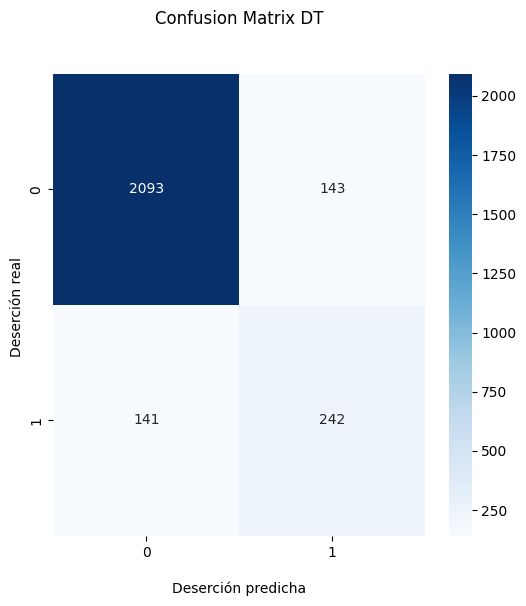

In [28]:
plt.figure(figsize=(6,6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix DT\n\n');
ax.set_xlabel('\nDeserción predicha')
ax.set_ylabel('Deserción real ');
plt.show();

## Revisión vs un clasificador Dummy

Dummy Classifier (most_frequent) Recall: 0.00%
Dummy Classifier (most_frequent) Accuracy: 85.38%


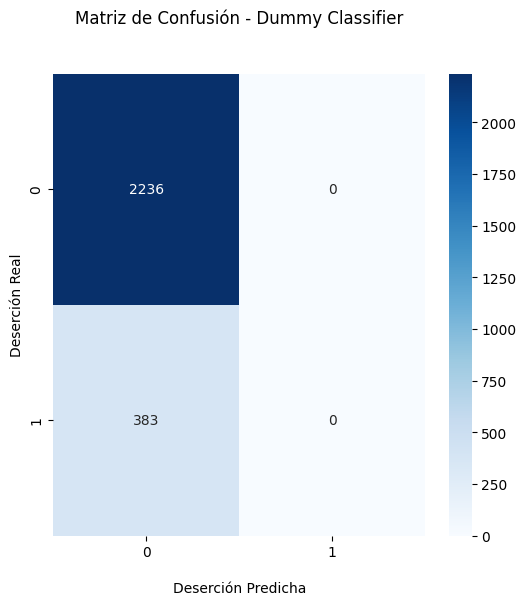

In [33]:
from sklearn.dummy import DummyClassifier

# Crear el clasificador Dummy (estrategia "most_frequent")
dummy_clf = DummyClassifier(strategy="most_frequent")

# Entrenar el clasificador Dummy con los datos de entrenamiento
dummy_clf.fit(x_train, Y_train)

# Hacer predicciones con el conjunto de prueba
dummy_pred = dummy_clf.predict(x_test)

# Evaluar el desempeño del DummyClassifier
dummy_recall = recall_score(Y_test, dummy_pred)
dummy_accuracy = accuracy_score(Y_test, dummy_pred)

# Imprimir los resultados
print(f"Dummy Classifier (most_frequent) Recall: {dummy_recall * 100:.2f}%")
print(f"Dummy Classifier (most_frequent) Accuracy: {dummy_accuracy * 100:.2f}%")

# Crear la matriz de confusión para el clasificador Dummy
cf_matrix = confusion_matrix(Y_test, dummy_pred)

# Configurar el tamaño de la figura
plt.figure(figsize=(6, 6))

# Crear el heatmap con formato de enteros
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')

# Ajustar los títulos y etiquetas
ax.set_title('Matriz de Confusión - Dummy Classifier\n\n')
ax.set_xlabel('\nDeserción Predicha')
ax.set_ylabel('Deserción Real')

# Mostrar el gráfico
plt.show()

## Selección del modelo

El mejor modelo entrenado fue un árbol de decisión con los hiperparámetros por defecto. Alcanzado un recall de 89.1% en el set de datos de prueba.

In [34]:
# Execute the selected model with the test data
DT = DecisionTreeClassifier()
DT.fit(x_train, Y_train)

pred = DT.predict(x_test)

## Obtención de las probabiliades para todos los registros del set de datos

In [41]:
x_total = df_datos.drop(columns="Desertor")

In [42]:
# Obtener las probabilidades para el conjunto de datos
probabilidades = DT.predict_proba(x_total)

In [43]:
probabilidades[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [44]:
# Predecir la clase para todos los datos
pred_total = DT.predict(x_total)
pred_total[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
# Agregar la predicción y la probabilidad al set de datos con los valores de usuario
datos_modelado = pd.read_csv("datos_limpios.csv", sep=";", encoding='ISO-8859-1')

In [66]:
datos_modelado.head()

,ID_SNIES,Sexo,Estado Civil,Etnia,Discapacidad,Departamento Nacimiento,Programa,Facultad,Tipo Plan,Nombre Plan,PROMEDIO_1er_SEMESTRE,PROMEDIO_2do_SEMESTRE,Desertor,Semestre Ingreso,Edad Ingreso,Cantidad de materias vistas,Cantidad de cursos libres reprobados,Cantidad de cursos libres aprobados,Promedio de las materias,Cantidad de materias perdidas,Cantidad de creditos inscritos,Semestre Ubicación
0,11803-1110,Femenino,Soltero(a),No pertenece,Ninguna,Meta,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.73,3.67,No,1,17,62,0.0,6.0,3.898036,1.0,159.0,9.0
1,1055-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.67,3.91,No,1,17,64,0.0,6.0,3.960000,1.0,159.0,9.0
2,1118-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.50,3.53,No,1,15,65,0.0,6.0,3.764576,4.0,165.0,9.0
3,4703-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.44,3.62,No,1,19,69,2.0,6.0,3.584500,6.0,171.0,9.0
4,4990-1110,Femenino,Soltero(a),No informa,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,4.00,3.90,No,1,18,61,0.0,6.0,4.094545,0.0,156.0,9.0


In [67]:
datos_modelado["Desertor Predicción"] = pred_total
datos_modelado["Desertor Predicción"] = datos_modelado["Desertor Predicción"].replace(0, 'No')
datos_modelado["Desertor Predicción"] = datos_modelado["Desertor Predicción"].replace(1, 'Si')

In [68]:
datos_modelado["Desertor Predicción"].value_counts()

Desertor Predicción
No    11175
Si     1917
Name: count, dtype: int64

In [69]:
datos_modelado['Probabilidad de deserción'] = probabilidades[:, 1]

In [70]:
datos_modelado

,ID_SNIES,Sexo,Estado Civil,Etnia,Discapacidad,Departamento Nacimiento,Programa,Facultad,Tipo Plan,Nombre Plan,PROMEDIO_1er_SEMESTRE,PROMEDIO_2do_SEMESTRE,Desertor,Semestre Ingreso,Edad Ingreso,Cantidad de materias vistas,Cantidad de cursos libres reprobados,Cantidad de cursos libres aprobados,Promedio de las materias,Cantidad de materias perdidas,Cantidad de creditos inscritos,Semestre Ubicación,Desertor Predicción,Probabilidad de deserción
0,11803-1110,Femenino,Soltero(a),No pertenece,Ninguna,Meta,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.73,3.67,No,1,17,62,0.0,6.0,3.898036,1.0,159.0,9.0,No,0.0
1,1055-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.67,3.91,No,1,17,64,0.0,6.0,3.960000,1.0,159.0,9.0,No,0.0
2,1118-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.50,3.53,No,1,15,65,0.0,6.0,3.764576,4.0,165.0,9.0,No,0.0
3,4703-1110,Femenino,Soltero(a),No pertenece,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.44,3.62,No,1,19,69,2.0,6.0,3.584500,6.0,171.0,9.0,No,0.0
4,4990-1110,Femenino,Soltero(a),No informa,Ninguna,Bogotá D.C.,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,4.00,3.90,No,1,18,61,0.0,6.0,4.094545,0.0,156.0,9.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13087,13728-1114,Masculino,Soltero(a),Pueblo indígena,No aplica,Vaupés,finanzas y relaciones internacionales,"finanzas, gobierno y relaciones internacionales",2,finanzas y relaciones internacionales,2.61,0.00,No,2,21,11,0.0,0.0,3.205455,5.0,22.0,1.0,No,0.0
13088,15930-1116,Masculino,Soltero(a),Pueblo indígena,No aplica,Vaupés,administración de empresas turísticas y hoteleras,administración de empresas turísticas y hoteleras,2,admon. empresas turisticas y hoteleras,3.14,3.67,No,2,32,29,0.0,2.0,3.612963,3.0,52.0,3.0,No,0.0
13089,13776-11737,Masculino,Soltero(a),No informa,No aplica,Vaupés,sociología,ciencias sociales y humanas,2,sociologia,3.63,3.38,No,2,21,19,0.0,0.0,3.634211,1.0,49.0,3.0,No,0.0
13090,12680-1110,Masculino,Soltero(a),No informa,No aplica,Vaupés,comunicación social - periodismo,comunicación social,2,comunicacion social y periodismo,3.46,3.91,No,1,18,64,0.0,6.0,3.737414,3.0,164.0,8.0,No,0.0


In [71]:
datos_modelado["Probabilidad de deserción"].value_counts()

Probabilidad de deserción
0.0    11175
1.0     1917
Name: count, dtype: int64

In [72]:
datos_modelado = datos_modelado.applymap(lambda x: str(x).replace('.', ',') if isinstance(x, float) else x)

In [73]:
datos_modelado.to_csv("datos_solucion.csv", index=False, encoding='ISO-8859-1', sep=";")